In [55]:
import numpy as np
import pandas as pd
from SARIMA import SARIMA
from sklearn.svm import SVR

In [56]:
load_df = pd.read_csv('Data/DOM/Load Actuals/Processed/Aggregated/load.csv')
load_df['lag1'] = load_df['MW'].shift()
load_df['lag2'] = load_df['MW'].shift(2)
load_df['lag3'] = load_df['MW'].shift(3)
load_df['lag4'] = load_df['MW'].shift(4)
load_df

,DATE,MW,lag1,lag2,lag3,lag4
0,2010-01-01 00:00:00,10273.0,NaN,NaN,NaN,NaN
1,2010-01-01 01:00:00,9960.0,10273.0,NaN,NaN,NaN
2,2010-01-01 02:00:00,9797.0,9960.0,10273.0,NaN,NaN
3,2010-01-01 03:00:00,9715.0,9797.0,9960.0,10273.0,NaN
4,2010-01-01 04:00:00,9851.0,9715.0,9797.0,9960.0,10273.0
...,...,...,...,...,...,...
87643,2019-12-31 19:00:00,11682.0,11954.0,11767.0,10853.0,10259.0
87644,2019-12-31 20:00:00,11443.0,11682.0,11954.0,11767.0,10853.0
87645,2019-12-31 21:00:00,11167.0,11443.0,11682.0,11954.0,11767.0
87646,2019-12-31 22:00:00,10839.0,11167.0,11443.0,11682.0,11954.0


In [57]:
weather_df = pd.read_csv('Data/DOM/Weather/Processed/Aggregated/weather.csv')
weather_df['DEW_C'] = (weather_df['DEW'] - 32) * (5.0/9)
weather_df['TMP_C'] = (weather_df['TMP'] - 32) * (5.0/9)
weather_df['RH'] = (np.exp((17.625*weather_df['DEW_C'])/(243.04+weather_df['DEW_C']))/np.exp((17.625*weather_df['TMP_C'])/(243.04+weather_df['TMP_C']))) 
weather_df.drop(['TMP', 'DEW', 'WND', 'DEW_C', 'TMP_C'], axis=1, inplace=True)
weather_df

,DATE,CR,HR,XHR,RH
0,2010-01-01 00:00:00,0.0,13.0,1.0,0.924584
1,2010-01-01 01:00:00,0.0,13.0,2.0,0.924584
2,2010-01-01 02:00:00,0.0,13.0,1.0,0.924584
3,2010-01-01 03:00:00,0.0,13.0,2.0,0.961468
4,2010-01-01 04:00:00,0.0,13.0,2.0,0.924584
...,...,...,...,...,...
87643,2019-12-31 19:00:00,0.0,4.0,0.0,0.398229
87644,2019-12-31 20:00:00,0.0,4.0,0.0,0.396591
87645,2019-12-31 21:00:00,0.0,5.0,0.0,0.411376
87646,2019-12-31 22:00:00,0.0,8.0,0.0,0.515690


In [58]:
calendar_df = pd.read_csv('Data/calendar.csv')

calendar_df

,DATE,IS_MONDAY,IS_TUESDAY,IS_WEDNESDAY,IS_THURSDAY,IS_FRIDAY,IS_SATURDAY,IS_SUNDAY,IS_JANUARY,IS_FEBRUARY,...,IS_HE15,IS_HE16,IS_HE17,IS_HE18,IS_HE19,IS_HE20,IS_HE21,IS_HE22,IS_HE23,IS_HE24
0,2010-01-01 00:00:00,0,0,0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-01-01 01:00:00,0,0,0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-01-01 02:00:00,0,0,0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-01-01 03:00:00,0,0,0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-01-01 04:00:00,0,0,0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2019-12-31 19:00:00,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
87644,2019-12-31 20:00:00,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87645,2019-12-31 21:00:00,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87646,2019-12-31 22:00:00,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
df = pd.concat([load_df,weather_df, calendar_df]).groupby('DATE').mean()

df = df[4:]
df

,MW,lag1,lag2,lag3,lag4,CR,HR,XHR,RH,IS_MONDAY,...,IS_HE15,IS_HE16,IS_HE17,IS_HE18,IS_HE19,IS_HE20,IS_HE21,IS_HE22,IS_HE23,IS_HE24
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-01 04:00:00,9851.0,9715.0,9797.0,9960.0,10273.0,0.0,13.0,2.0,0.924584,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 05:00:00,10178.0,9851.0,9715.0,9797.0,9960.0,0.0,13.0,1.0,0.924584,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 06:00:00,10497.0,10178.0,9851.0,9715.0,9797.0,0.0,13.0,2.0,0.924584,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 07:00:00,10749.0,10497.0,10178.0,9851.0,9715.0,0.0,13.0,1.0,0.888800,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 08:00:00,11000.0,10749.0,10497.0,10178.0,9851.0,0.0,13.0,2.0,0.924256,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,11682.0,11954.0,11767.0,10853.0,10259.0,0.0,4.0,0.0,0.398229,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2019-12-31 20:00:00,11443.0,11682.0,11954.0,11767.0,10853.0,0.0,4.0,0.0,0.396591,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2019-12-31 21:00:00,11167.0,11443.0,11682.0,11954.0,11767.0,0.0,5.0,0.0,0.411376,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [61]:
from sklearn.model_selection import train_test_split

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, shuffle=False, test_size=168)

In [62]:
x_test.lag1 = np.nan
x_test.lag2 = np.nan
x_test.lag3 = np.nan
x_test.lag4 = np.nan

In [63]:
sarima_train = y_train[-672:]
sarima_test = y_test

In [64]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(sarima_train, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -1.939124
p-value                          0.313886
#Lags Used                      20.000000
Number of Observations Used    651.000000
Critical Value (1%)             -3.440435
Critical Value (5%)             -2.865990
Critical Value (10%)            -2.569140
dtype: float64

/opt/homebrew/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


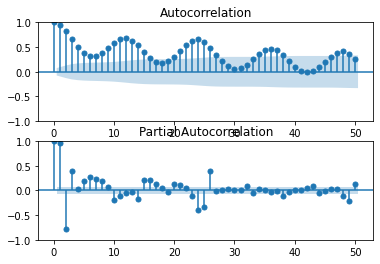

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)
ax[0] = sm.graphics.tsa.plot_acf(sarima_train, lags=50, ax=ax[0])
ax[1] = sm.graphics.tsa.plot_pacf(sarima_train, lags=50, ax=ax[1])

In [66]:
import statsmodels.api as sm

sarima_model = sm.tsa.statespace.SARIMAX(sarima_train,
                                        order=(2, 0, 0),
                                        seasonal_order=(2, 0, 0, 24),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False).fit()

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.28983D+00    |proj g|=  5.01674D-01

At iterate    5    f=  6.27900D+00    |proj g|=  2.55541D-02

At iterate   10    f=  6.27715D+00    |proj g|=  5.71366D-03

At iterate   15    f=  6.27710D+00    |proj g|=  4.22961D-03

At iterate   20    f=  6.27566D+00    |proj g|=  5.09196D-02

At iterate   25    f=  6.10426D+00    |proj g|=  8.85546D-01

At iterate   30    f=  6.00591D+00    |proj g|=  8.37126D-02

At iterate   35    f=  6.00488D+00    |proj g|=  1.11981D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [67]:
pred = sarima_model.forecast(steps=168)
pred

2019-12-25 00:00:00    11130.831152
2019-12-25 01:00:00    11102.539634
2019-12-25 02:00:00    11119.943245
2019-12-25 03:00:00    11288.690718
2019-12-25 04:00:00    11596.109888
                           ...     
2019-12-31 19:00:00     9380.794956
2019-12-31 20:00:00     9356.716428
2019-12-31 21:00:00     9271.022918
2019-12-31 22:00:00     9109.077911
2019-12-31 23:00:00     8899.418240
Freq: H, Name: predicted_mean, Length: 168, dtype: float64

In [68]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test[0:168], pred)

0.06534569633102744

In [69]:
pred = pred.round()
pred

2019-12-25 00:00:00    11131.0
2019-12-25 01:00:00    11103.0
2019-12-25 02:00:00    11120.0
2019-12-25 03:00:00    11289.0
2019-12-25 04:00:00    11596.0
                        ...   
2019-12-31 19:00:00     9381.0
2019-12-31 20:00:00     9357.0
2019-12-31 21:00:00     9271.0
2019-12-31 22:00:00     9109.0
2019-12-31 23:00:00     8899.0
Freq: H, Name: predicted_mean, Length: 168, dtype: float64

In [70]:
pred = pd.DataFrame(pred)
pred.set_index(pd.to_datetime(pred.index), inplace=True)


In [71]:
x_test = pd.DataFrame(x_test)
x_test.set_index(pd.to_datetime(x_test.index), inplace=True)

x_test

,lag1,lag2,lag3,lag4,CR,HR,XHR,RH,IS_MONDAY,IS_TUESDAY,...,IS_HE15,IS_HE16,IS_HE17,IS_HE18,IS_HE19,IS_HE20,IS_HE21,IS_HE22,IS_HE23,IS_HE24
DATE,,,,,,,,,,,,,,,,,,,,,
2019-12-25 00:00:00,NaN,NaN,NaN,NaN,0.0,10.0,0.0,0.675633,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-25 01:00:00,NaN,NaN,NaN,NaN,0.0,13.0,2.0,0.788691,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-25 02:00:00,NaN,NaN,NaN,NaN,0.0,13.0,2.0,0.787841,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-25 03:00:00,NaN,NaN,NaN,NaN,0.0,14.0,4.0,0.852405,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-25 04:00:00,NaN,NaN,NaN,NaN,0.0,15.0,4.0,0.851784,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,NaN,NaN,NaN,NaN,0.0,4.0,0.0,0.398229,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2019-12-31 20:00:00,NaN,NaN,NaN,NaN,0.0,4.0,0.0,0.396591,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2019-12-31 21:00:00,NaN,NaN,NaN,NaN,0.0,5.0,0.0,0.411376,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
from datetime import datetime
from datetime import timedelta

for index, row in x_test.iterrows():
    lag1_time = index - timedelta(hours=1)
    lag2_time = index - timedelta(hours=2)
    lag3_time = index - timedelta(hours=3)
    lag4_time = index - timedelta(hours=4)

    if lag1_time in pred.index:
        row.lag1 = pred.loc[lag1_time]

    if lag2_time in pred.index:
        row.lag2 = pred.loc[lag2_time]

    if lag3_time in pred.index:
        row.lag3 = pred.loc[lag3_time]

    if lag4_time in pred.index:
        row.lag4 = pred.loc[lag4_time]

x_test

,lag1,lag2,lag3,lag4,CR,HR,XHR,RH,IS_MONDAY,IS_TUESDAY,...,IS_HE15,IS_HE16,IS_HE17,IS_HE18,IS_HE19,IS_HE20,IS_HE21,IS_HE22,IS_HE23,IS_HE24
DATE,,,,,,,,,,,,,,,,,,,,,
2019-12-25 00:00:00,NaN,NaN,NaN,NaN,0.0,10.0,0.0,0.675633,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-25 01:00:00,11131.0,NaN,NaN,NaN,0.0,13.0,2.0,0.788691,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-25 02:00:00,11103.0,11131.0,NaN,NaN,0.0,13.0,2.0,0.787841,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-25 03:00:00,11120.0,11103.0,11131.0,NaN,0.0,14.0,4.0,0.852405,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-25 04:00:00,11289.0,11120.0,11103.0,11131.0,0.0,15.0,4.0,0.851784,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,9460.0,9455.0,8824.0,8465.0,0.0,4.0,0.0,0.398229,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2019-12-31 20:00:00,9381.0,9460.0,9455.0,8824.0,0.0,4.0,0.0,0.396591,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2019-12-31 21:00:00,9357.0,9381.0,9460.0,9455.0,0.0,5.0,0.0,0.411376,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [73]:
y_train = pd.DataFrame(y_train)
y_train.set_index(pd.to_datetime(y_train.index), inplace=True)
y_train

,MW
DATE,
2010-01-01 04:00:00,9851.0
2010-01-01 05:00:00,10178.0
2010-01-01 06:00:00,10497.0
2010-01-01 07:00:00,10749.0
2010-01-01 08:00:00,11000.0
...,...
2019-12-24 19:00:00,11706.0
2019-12-24 20:00:00,11710.0
2019-12-24 21:00:00,11664.0


In [74]:
for index, row in x_test.iterrows():
    lag1_time = index - timedelta(hours=1)
    lag2_time = index - timedelta(hours=2)
    lag3_time = index - timedelta(hours=3)
    lag4_time = index - timedelta(hours=4)

    if np.isnan(row.lag1):
        row.lag1 = y_train.loc[lag1_time]

    if np.isnan(row.lag2):
        row.lag2 = y_train.loc[lag2_time]

    if np.isnan(row.lag3):
        row.lag3 = y_train.loc[lag3_time]

    if np.isnan(row.lag4):
        row.lag4 = y_train.loc[lag4_time]

x_test

,lag1,lag2,lag3,lag4,CR,HR,XHR,RH,IS_MONDAY,IS_TUESDAY,...,IS_HE15,IS_HE16,IS_HE17,IS_HE18,IS_HE19,IS_HE20,IS_HE21,IS_HE22,IS_HE23,IS_HE24
DATE,,,,,,,,,,,,,,,,,,,,,
2019-12-25 00:00:00,11315.0,11519.0,11664.0,11710.0,0.0,10.0,0.0,0.675633,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-25 01:00:00,11131.0,11315.0,11519.0,11664.0,0.0,13.0,2.0,0.788691,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-25 02:00:00,11103.0,11131.0,11315.0,11519.0,0.0,13.0,2.0,0.787841,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-25 03:00:00,11120.0,11103.0,11131.0,11315.0,0.0,14.0,4.0,0.852405,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-25 04:00:00,11289.0,11120.0,11103.0,11131.0,0.0,15.0,4.0,0.851784,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,9460.0,9455.0,8824.0,8465.0,0.0,4.0,0.0,0.398229,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2019-12-31 20:00:00,9381.0,9460.0,9455.0,8824.0,0.0,4.0,0.0,0.396591,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2019-12-31 21:00:00,9357.0,9381.0,9460.0,9455.0,0.0,5.0,0.0,0.411376,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [76]:
#model = SVR(kernel='rbf', C=701.3536328125001, gamma=0.023333005593254352)
model = SVR(kernel='rbf', C=701.3536328125001, gamma=0.023333005593254352)
model.fit(x_train_scaled, y_train['MW'])

SVR(C=701.3536328125001, gamma=0.023333005593254352)

In [77]:
y_pred_scaled = model.predict(x_test_scaled)

In [78]:
y_test

DATE
2019-12-25 00:00:00    11198.0
2019-12-25 01:00:00    11192.0
2019-12-25 02:00:00    11288.0
2019-12-25 03:00:00    11511.0
2019-12-25 04:00:00    11804.0
                        ...   
2019-12-31 19:00:00    11682.0
2019-12-31 20:00:00    11443.0
2019-12-31 21:00:00    11167.0
2019-12-31 22:00:00    10839.0
2019-12-31 23:00:00    10593.0
Name: MW, Length: 168, dtype: float64

In [79]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred_scaled)

0.062050390122507224

In [80]:
y_test = pd.DataFrame(y_test)
y_test['pred'] = y_pred_scaled
y_test['mape'] = (y_test['MW'] - y_test['pred']) / y_test['MW']
y_test

,MW,pred,mape
DATE,,,
2019-12-25 00:00:00,11198.0,10879.921241,0.028405
2019-12-25 01:00:00,11192.0,10788.510325,0.036052
2019-12-25 02:00:00,11288.0,10836.984161,0.039955
2019-12-25 03:00:00,11511.0,11050.944373,0.039967
2019-12-25 04:00:00,11804.0,11329.534498,0.040195
...,...,...,...
2019-12-31 19:00:00,11682.0,9796.252649,0.161423
2019-12-31 20:00:00,11443.0,9662.262781,0.155618
2019-12-31 21:00:00,11167.0,9471.992513,0.151787
